# Occupancy Forecasting Notebook

In [1]:
#Imports
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset

from datetime import datetime
import plotly.graph_objects as go

from _dfguru import DataFrameGuru as DFG
from _preprocessing import PLCount
import os

dfg = DFG()

## Make Plots for Dataset section

In [2]:
frequency = "1min"

# Path to data directory
path_to_occ_data = f"data/freq_{frequency}"
path_to_data_dir = f"data"

course_dates_data = dfg.load_dataframe(
    path_repo=path_to_data_dir, 
    file_name="course_dates")

course_info_data = dfg.load_dataframe(
    path_repo=path_to_data_dir, 
    file_name="course_info")

data_dict = {}
for room_id in [0, 1]:
    
    ########## Load Data ##########
    occ_time_series = dfg.load_dataframe(
        path_repo=os.path.join(path_to_data_dir, f"freq_{frequency}"), 
        file_name=f"room-{room_id}_cleaned_data_29_08", 
    )
    
    occ_time_series = occ_time_series[:-1].rename(columns={"CC_estimates":"occ_count"})
    
    print(len(occ_time_series))

118080
118080


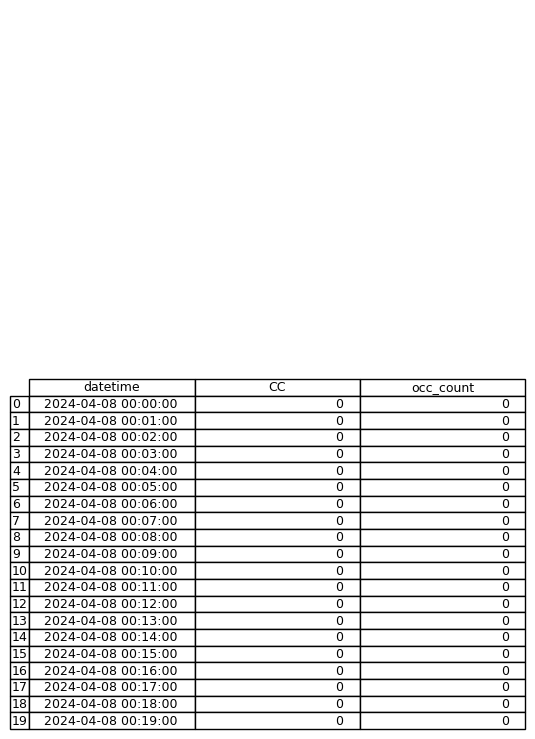

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table 

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, occ_time_series.head(20))  # where df is your data frame

plt.savefig('occ_count_table.png')

In [9]:
course_dates_data

,course_number,weekday,room,note,exam,test,tutorium,room_id,start_time,end_time,room_capacity,calendar_week
0,340.100,Di.,HS 18,NaN,False,False,False,0,2024-04-09 10:15:00,2024-04-09 11:45:00,164,15
1,340.100,Di.,HS 18,NaN,False,False,False,0,2024-04-16 10:15:00,2024-04-16 11:45:00,164,16
2,340.100,Di.,HS 18,NaN,False,False,False,0,2024-04-23 10:15:00,2024-04-23 11:45:00,164,17
3,340.100,Di.,HS 18,NaN,False,False,False,0,2024-05-07 10:15:00,2024-05-07 11:45:00,164,19
4,340.100,Di.,HS 18,NaN,False,False,False,0,2024-05-14 10:15:00,2024-05-14 11:45:00,164,20
...,...,...,...,...,...,...,...,...,...,...,...,...
625,102.016,Mo.,HS 19,NaN,False,False,False,1,2024-03-04 15:30:00,2024-03-04 18:45:00,152,10
626,102.016,Mo.,HS 19,NaN,False,False,False,1,2024-03-11 15:30:00,2024-03-11 18:45:00,152,11
627,102.016,Mo.,HS 19,NaN,False,False,False,1,2024-03-18 15:30:00,2024-03-18 18:45:00,152,12
628,256.902,Mi.,HS 19,NaN,False,False,False,1,2024-03-06 17:15:00,2024-03-06 20:15:00,152,10


In [28]:
min_time = occ_time_series["datetime"].min()
max_time = occ_time_series["datetime"].max()

date_filtered = dfg.filter_by_timestamp(course_dates_data, "start_time", min_time, max_time)

len(course_dates_data), len(date_filtered)

len(date_filtered["course_number"].unique())



81

In [39]:
info_filtered = dfg.filter_by_courses(course_info_data, date_filtered["course_number"].unique()).drop_duplicates(subset=["course_number"])
info_filtered["study_subject"]

0                            Software
1                       Not available
8                         Anwendungen
9        Data & Knowledge Engineering
10     Wahlfach Wirtschaftsinformatik
                    ...              
124                        Wahlfächer
125                     Pflichtfächer
126                     Pflichtfächer
127                     Pflichtfächer
133                     Pflichtfächer
Name: study_subject, Length: 81, dtype: object

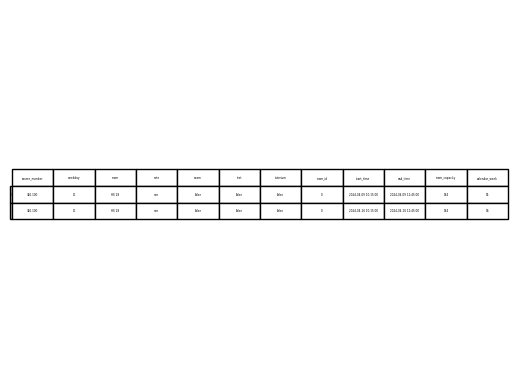

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table 


course_dates_data 

course_info_data 

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, course_dates_data[:2], loc="center", cellLoc="center",)  # where df is your data frame

plt.savefig('course_dates.png')

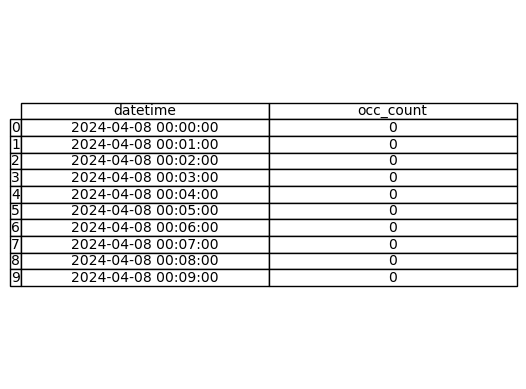

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table 

occ_to_plot_room_1 = occ_time_series.drop(columns=["CC"])

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, occ_to_plot_room_1.head(10), loc="center", cellLoc="center",)  # where df is your data frame

plt.savefig('occ_count_table.png')

In [7]:

occ_to_plot_room_1["day"] = occ_to_plot_room_1["datetime"].dt.date

len(occ_to_plot_room_1["day"].unique())


1440 * 82 * 2


236160

In [8]:
raise

RuntimeError: No active exception to reraise

# 1.) Data Preprocessing

In [ ]:
#Reading the dataset
dfg = DFG()

data = dfg.read_data(
    path_repo="../data/cleaned_data", 
    file_name="frequency_data", 
)

data = dfg.clean_signal_data(data)

min_timestamp = data["datetime"].min().replace(hour=0, minute=0, second=0, microsecond=0)
max_timestamp = data["datetime"].max().replace(hour=0, minute=0, second=0, microsecond=0) + DateOffset(days=1)

### Once more a preprocessing run I forgot to clean the signal outside lecture time 22:00-7:30

In [ ]:
course_dates_data = dfg.read_data(
        path_repo="../data/cleaned_data", 
        file_name="course_dates", 
    )

course_info_data = dfg.read_data(
    path_repo="../data/cleaned_data", 
    file_name="course_info", 
)

### 1.1) Filter out Facility Management Events

Maybe a course is missing: 8.4. - 28.6.

## Check again after preprocessing is final

HS18:
* 22.4 17:15-18:00 - safe something missing
* 26.4. 8:30-10:00 - safe something missing
* 3.5. 12:00 bis 18:30 - there is something happening -> plot but it doesn't seem to be a lecture
* 15.5. 15:15 bis 17:45 - there is also something happening 
* 4.6. 17:00 - 19:00 -> There is also something happening
* 20.6. 15:30 - 17:00, 17:15-18:45

HS19:
* 12.4. 13:45 - 15:45 -> no normal lecture is something different
* 13.5. 13:45 - 15:15, afterwards - 19:05 (something different)  -> check preprocessing! -> 5 events ruined that afternoon
* 15.5. 15:30 - 17:30 -> safe a lecture
* 5.6. 8:30 - 10:00 -> student preparing for exam
* 26.6. 8:30 - 10:00, 12:00-14:30 -> something happening!

#### Try to clean events outside lecture hours -> show that sometimes Kusss seems to be incorrect:


Visually proof that something might be off! At the times above

In [ ]:
#course_dates_data = dfg.derive_day(course_dates_data, "start_time")
#course_dates_data_reduced = dfg.filter_by_daterange(course_dates_data, "start_time", min_timestamp.date(), max_timestamp.date())

#lecture_hours = []
#min_times = []
#max_times = []
#for grouping, df in course_dates_data_reduced.groupby(["room_id", "day"]):
    
#    max_time = (df["end_time"].max() + DateOffset(minutes=15)).time()
#    min_time = (df["start_time"].min() - DateOffset(minutes=15)).time()
#    min_times.append(min_time)
#    max_times.append(max_time)

#    group_mask = (data["room_id"] == grouping[0]) & (data["datetime"].dt.date == grouping[1])
#    data_group = data[group_mask]
    
#    #if (df["start_time"].min().date() == datetime.date(datetime(2024, 5, 15))) and grouping[0] == 0:
#    #    print(grouping)
#    #    print(df.sort_values(by="start_time").to_string())
#    #    print(min_time, max_time)
#    #    print(data_group.to_string())
#    #    print("-------------------")
#    #    print()
        
#    group_mask = (data["room_id"] == grouping[0]) & (data["datetime"].dt.date == grouping[1])
#    data_group = data[group_mask]
    
    
#    outside_hours_mask = (data_group["datetime"].dt.time < min_time) | (data_group["datetime"].dt.time > max_time)
#    #print(data_group[outside_hours_mask].to_string())
#    #lecture_hours = group_mask & (data["datetime"].dt.time >= min_time) & (data["datetime"].dt.time <= max_time)
    
    

## 1. Data Cleaning with PLCount

In [ ]:

frequency = "1h"
plcount = PLCount()

data_dict = {}
for room_id, df in data.groupby("room_id"):
    data_filterd_room = dfg.filter_by_roomid(data, room_id)
    occ_list = plcount.run_on_whole_dataset(data_filterd_room, dfg, frequency)
    data_dict[room_id] = pd.concat(occ_list).drop_duplicates(subset="datetime").reset_index(drop=True)

100%|██████████| 82/82 [00:00<00:00, 143.40it/s]


### 1.1 Plot differences

In [ ]:
## raw_data
#fig = go.Figure()

#fig.add_trace(
#    go.Scatter(
#        x=occupancy_data_raw["datetime"], 
#        y=occupancy_data_raw["CC"],
#        mode="lines",
#        name="Raw Occupancy"))

#fig.add_trace(
#    go.Scatter(
#        x=occupancy_data_cleaned["datetime"], 
#        y=occupancy_data_cleaned["CC"],
#        mode="lines",
#        name="Reset at Midnight"))

#fig.add_trace(
#    go.Scatter(
#        x=occupancy_data_cleaned["datetime"], 
#        y=occupancy_data_cleaned["CC_estimates"],
#        mode="lines",
#        name="PLCount Estimates"))

#fig.show()

## 2. Contextual features

Classic Contextual features: (mostly endogenous)
* Sangogboye, Arendt: Dayname, Daytype(weekend/weekday), Season(Winter, Summer), Holiday(yes/no)(exogenous)
* Sangogboye, Kjaaergard: Dayname, Daytype, Season, Holiday
* Araz Ashouri, Member, IEEE, Guy R. Newsham: Hour of Day (Sin + Cosine), Day of week (0 = Holiday, Weekends; 1 = Weekday) 

My ideas:
* Include Zwickeltag - exogenous
* Make use of lecture schedule from Kusss - exogenous



In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

seed = 42
rng = np.random.default_rng(seed=seed)
torch.manual_seed(seed)

from _forecasting import OccFeatureEngineer

In [ ]:
for room_id in data_dict:
    
    print(f"Room ID: {room_id}")
    
    occ_time_series = OccFeatureEngineer(
        data_dict[room_id], 
        course_dates_data, 
        course_info_data, dfg
    ).derive_features(
        features=["exam", "lecture"], 
        room_id=room_id
    )      
    print("--------------------")
    print()
    
    data_dict[room_id] = occ_time_series

Room ID: 0


/home/berni/github_repos/data_processing/forecasting/_forecasting/data.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '258.410' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  time_series.loc[course_time_mask, "course_number"] = ",".join(sub_df["course_number"].values)


--------------------

Room ID: 1


/home/berni/github_repos/data_processing/forecasting/_forecasting/data.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '238.302' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  time_series.loc[course_time_mask, "course_number"] = ",".join(sub_df["course_number"].values)


--------------------



## 3. Validation Strategy and Train-Test Split

In [ ]:
from _forecasting import OccupancyDataset, train_val_test_split

## 4. Training

In [ ]:
from _forecasting import OccupancyDenseNet
from _forecasting import MasterTrainer

from torch import nn
from torch.optim import Adam

hyperparameters = {
        "lr": 0.001,
        "batch_size": 16,
        "hidden_size": 32,
        "x_size": 24,
        "y_size": 24,
}

mt = MasterTrainer(
    model_class = OccupancyDenseNet,
    optimizer = Adam,
    hyperparameters = hyperparameters,
    criterion= nn.MSELoss()
)

In [ ]:
train_dict, val_dict, test_dict = train_val_test_split(data_dict, verbose=False)
train_set, val_set, test_set = mt.initialize_dataset(train_dict, val_dict, test_dict, frequency)
train_loader, val_loader, test_loader = mt.initialize_dataloader(train_set, val_set, test_set)

mt.update_hyperparameters(
    {"input_size": hyperparameters["x_size"], 
    "output_size": hyperparameters["y_size"]}
)
model = mt.initialize_model()
optimizer = mt.initialize_optimizer(model)

n_epochs = 15

mean_train_losses = []
mean_val_losses = []
val_losses = []
train_losses = []

for n_epoch in range(n_epochs):

    train_loss, val_loss = mt.train(train_loader, model, optimizer, val_loader)
        
    mean_train_losses.append(np.mean(train_loss))
    mean_val_losses.append(np.mean(val_loss))
    val_losses.extend(val_loss)
    train_losses.extend(train_loss)
    
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=np.arange(1, n_epochs+1), 
        y=mean_train_losses,
        mode="lines",
        name=f"Train Loss"))

/home/berni/anaconda3/envs/webapp/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/berni/anaconda3/envs/webapp/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
hyperparameters = {
        "lr": 0.001,
        "batch_size": 16,
        "hidden_size": 32,
        "x_size": 24,
        "y_size": 24,
}

mt = MasterTrainer(
    model_class = OccupancyDenseNet,
    optimizer = Adam,
    hyperparameters = hyperparameters,
    criterion= nn.MSELoss()
)

train_dict, val_dict, test_dict = train_val_test_split(data_dict, verbose=False)
train_set, val_set, test_set = mt.initialize_dataset(train_dict, val_dict, test_dict, frequency)
train_loader, val_loader, test_loader = mt.initialize_dataloader(train_set, val_set, test_set)

mt.update_hyperparameters(
    {"input_size": hyperparameters["x_size"], 
    "output_size": hyperparameters["y_size"]}
)
model = mt.initialize_model()
optimizer = mt.initialize_optimizer(model)

n_epochs = 15

mean_train_losses = []
mean_val_losses = []
val_losses = []
train_losses = []

for n_epoch in range(n_epochs):

    train_loss, val_loss = mt.train(train_loader, model, optimizer, val_loader)
        
    mean_train_losses.append(np.mean(train_loss))
    mean_val_losses.append(np.mean(val_loss))
    val_losses.extend(val_loss)
    train_losses.extend(train_loss)
    
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=np.arange(1, n_epochs+1), 
        y=mean_train_losses,
        mode="lines",
        name=f"Train Loss"))

/home/berni/anaconda3/envs/webapp/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/home/berni/anaconda3/envs/webapp/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



In [ ]:
# write a nice training and testing suite


#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#n_epochs = 10
#n_updates = 0

#mean_train_losses = []
#mean_val_losses = []
#val_losses = []
#train_losses = []

#for n_epoch in range(n_epochs):

#    train_loss, val_loss = mt.train(train_loader, model, optimizer, val_loader)
        
#    mean_train_losses.append(np.mean(train_loss))
#    mean_val_losses.append(np.mean(val_loss))
#    val_losses.extend(val_loss)
#    train_losses.extend(train_loss)
    
    

#fig = go.Figure()

#fig.add_trace(
#    go.Scatter(
#        x=np.arange(1, n_epochs+1), 
#        y=mean_train_losses,
#        mode="lines",
#        name=f"Train Loss"))

#fig.add_trace(
#go.Scatter(
#    x=np.arange(1, n_epochs+1), 
#    y=mean_val_losses,
#    mode="lines",
#    name=f"Validation Loss"))   

AttributeError: 'torch.device' object has no attribute '_apply'

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

batch_size = 4
hidden_size = 24
learning_rate = 0.01


train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)

model = OccupancyDenseNet(input_size=train_set.x_size, 
                          hidden_size=hidden_size, 
                          output_size=train_set.y_size).to(device)

mse = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_epochs = 10
n_updates = 0
epoch_losses = np.zeros((n_epochs, 2))

for n_epoch in range(n_epochs):

    val_loss = []
    train_loss = []
    for info, X, y in train_loader:
        
        optimizer.zero_grad()
        
        X = X.to(device)
        y = y.to(device)
        
        model_output = model(X)
        loss = mse(model_output, y)
        
        loss.backward()
        optimizer.step()
        n_updates += 1
        
        # validate every 100 updates
        train_loss.append(loss.cpu().detach())
        
    epoch_losses[n_epoch, 0] = np.mean(train_loss)
    

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=np.arange(1, n_epochs+1), 
        y=epoch_losses[:, 0],
        mode="lines",
        name=f"Train Loss"))

In [ ]:
def evaluate_model(model, loader, loss):
    pass 

In [ ]:
# raw_data
fig = go.Figure()

room_id = 0

fig.add_trace(
    go.Scatter(
        x=train_dict[0]["datetime"], 
        y=train_dict[0]["CC_estimates"],
        mode="lines",
        name=f"Trainset of Room {room_id}"))
fig.add_trace(
    go.Scatter(
        x=val_dict[0]["datetime"], 
        y=val_dict[0]["CC_estimates"],
        mode="lines",
        name=f"Validationset of Room {room_id}"))
fig.add_trace(
    go.Scatter(
        x=test_dict[0]["datetime"], 
        y=test_dict[0]["CC_estimates"],
        mode="lines",
        name=f"Testset of Room {room_id}"))

fig.show()

In [ ]:
course_info_data.head(5)

,course_number,course_name,type,kind,lecturer,semester,ects,max_students,registered_students,no_dates_total,...,level,study_area,university,curriculum,assessment_criteria,teaching_methods,language,other_information,study_subject,room_id
0,340.100,Algorithmen und Datenstrukturen 1,VO,Präsenz,Alois Ferscha,2024S,"3,00",200,194,14.0,...,B1 - Bachelor 1. Jahr,Informatik,Johannes Kepler Universität Linz,Bachelorstudium Informatik,Klausur am Semesterende,Foliengestützter Vortrag,Deutsch,https://www.pervasive.jku.at/Teaching/,Software,0
1,531.163,Analysis II,UE,Präsenz,Jan-Michael Holzinger,2024S,"2,00",25,10,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not available,0
2,531.160,Analysis II,VO,Präsenz,Friedrich Pillichshammer,2024S,"3,00",100,98,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not available,0
3,256.906,Anwendung ERP-Systeme II,KS,Präsenz,N. N.,2024S,"3,00",60,59,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not available,0
4,239.141,Behavioral Economics,KS,Präsenz,Matthias Fahn,2024S,"3,00",200,145,10.0,...,B2 - Bachelor 2. Jahr,Volkswirtschaftslehre,Johannes Kepler Universität Linz,Bachelorstudium Wirtschaftswissenschaften,Klausur,"Vortrag und Diskussion, Experimente",Englisch,NaN,Wahlfächer,0


## 3. Validation Strategy and Train-Test Split


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset

### 3.1 Start easy -> from day t-1 predict day t

In [ ]:
# bring the data into correct structure: X=day_t-1, y=day_t

samples = []
sample_info = []
for room_id in data_dict:
    occ_df = data_dict[room_id]
    occ_df["day"] = occ_df["datetime"].dt.date
    
    # exclude last day from grouping
    for day, df in list(occ_df.groupby("day"))[:-2]:

        next_day = occ_df[occ_df["day"] == (day + DateOffset(days=1)).date()]
        
        X = df["CC_estimates"].values
        y = next_day["CC_estimates"].values
        
        x_times = df["datetime"].values
        y_times = next_day["datetime"].values

        samples.append((X, y, y_times))
        sample_info.append((room_id, day))
        
samples = np.array(samples)
sample_info = np.array(sample_info)

In [ ]:
sample_info.shape

(162, 2)

In [ ]:
kfold = KFold(n_splits=5, shuffle=False)

predictions = []
for train, test in kfold.split(samples):
    X_train = samples[train][:,0]
    y_train = samples[train][:,1]
    
    test_samples =  samples[test]
    X_test = test_samples[:,0]
    y_test = test_samples[:,1]
    
    print("--------------------")
    regr = MLPRegressor(
        hidden_layer_sizes=(6,6),
        batch_size=1,
        random_state=1, 
        max_iter=5000).fit(X_train, y_train)
    score = regr.score(X_test, y_test)
    print(score)
    preds = regr.predict(X_test[:10])
    predictions.append((preds, y_test[:10], test_samples[:,2]))
    print("--------------------")

--------------------
-0.7340202309459386
--------------------
--------------------
-0.30616667394601976
--------------------
--------------------
-0.5286922465710288
--------------------
--------------------
-0.36444199859021387
--------------------
--------------------
-0.3560925020711305
--------------------


In [ ]:
fig = go.Figure()

x_axis = np.concatenate([pd.to_datetime(x)for x in predictions[0][2]])

fig.add_trace(
    go.Scatter(
        x=x_axis, 
        y=np.concatenate(predictions[0][0]),
        mode="lines",
        name="Predictions"))


fig.add_trace(
    go.Scatter(
        x=x_axis, 
        y=np.concatenate(predictions[0][1]),
        mode="lines",
        name="Target"))



fig.show()

In [ ]:
[pd.to_datetime(x)for x in predictions[0][2]]

[DatetimeIndex(['2024-04-08 00:00:00', '2024-04-08 01:00:00',
                '2024-04-08 02:00:00', '2024-04-08 03:00:00',
                '2024-04-08 04:00:00', '2024-04-08 05:00:00',
                '2024-04-08 06:00:00', '2024-04-08 07:00:00',
                '2024-04-08 08:00:00', '2024-04-08 09:00:00',
                '2024-04-08 10:00:00', '2024-04-08 11:00:00',
                '2024-04-08 12:00:00', '2024-04-08 13:00:00',
                '2024-04-08 14:00:00', '2024-04-08 15:00:00',
                '2024-04-08 16:00:00', '2024-04-08 17:00:00',
                '2024-04-08 18:00:00', '2024-04-08 19:00:00',
                '2024-04-08 20:00:00', '2024-04-08 21:00:00',
                '2024-04-08 22:00:00', '2024-04-08 23:00:00'],
               dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-04-09 00:00:00', '2024-04-09 01:00:00',
                '2024-04-09 02:00:00', '2024-04-09 03:00:00',
                '2024-04-09 04:00:00', '2024-04-09 05:00:00',
                '2

In [ ]:

#n_lags = 10
#lag_list = list(range(0, n_lags))

#fig = go.Figure()
#acf_array = acf(occ_df["CC_estimates"], nlags=n_lags) 
#fig.add_trace(
#    go.Bar(
#        x=lag_list,
#        y=acf_array,
#        name='Auto Correlation'
#    )
#)
#pacf_array = pacf(occ_df["CC_estimates"], nlags=n_lags) 
#fig.add_trace(
#    go.Bar(
#        x=lag_list,
#        y=pacf_array,
#        name='Partial Auto Correlation'
#    )
#)

#fig.show()
#critical_value = 1.96 / np.sqrt(len(occ_df))
#fig.add_hline(y=critical_value, line_width=1, line_dash="dot", line_color="black")
#fig.add_hline(y=-critical_value, line_width=1, line_dash="dot", line_color="black")

occ_df["CC_estimates"].corr(occ_df["lecture"])

0.7544044376991862

## 5. Basic Statistics and Plots

In [ ]:
#data_filterd = filter_room_id(data, 0)

Bar Charts

In [ ]:
# Paper: 
# Basic bar plots count of events after resampling
# Check if it follows some distribution

#data_filterd = filter_by_event_type(data_filterd, 1)
#data_resampled = resample(data_filterd, "datetime", "5min", "count")


#data_trimmed = data_resampled[data_resampled["event_type"] > 0]
#value_counts = data_trimmed.value_counts("event_type")

#fig = go.Figure()
## line plot
#fig.add_trace(
#    go.Bar(
#        x=value_counts.index, 
#        y=value_counts, 
#        name='value_counts'))


Boxplot

In [ ]:
# Boxplot plots -> Boxplot for every day and time
# Do for different events and rooms

#data_plot = occupancy_data_cleaned
#data_plot = handler.derive_time(data_plot)
#data_plot = handler.derive_weekday(data_plot)
#data_plot = handler.derive_week(data_plot)
#data_plot = data_plot.drop("datetime", axis=1)

#data_plot = data_plot.groupby(["week", "time", "weekday"]).sum().reset_index()

#print(data_plot)
#fig = px.box(data_plot, x="time", y="CC_estimates")
## make figure larger
#fig.update_layout(
#    autosize=False,
#    width=1000,
#    height=500,
#)
#fig.show()

More plots in the other notebook

## 1.Patterns

clustering -> different algorithms, k-means

Papers tried: 

### 1.1 Occupancy data analytics and prediction: A case study - Xin Liang a, b, Tianzhen Hong b, *, Geoffrey Qiping Shen

Distance Measures: Eucleadian, Dynamic Time Warp, Correlation Simmilarity -> compared among all different configurations

Clustering Algos: K-Means, 

Algorithm Evaluation: Davies-Bouldin index, to find best k

Insights of the paper:

* High variability in the data statistical methods using some kind of mean will fail miserably!

In [ ]:
import json
from collections import defaultdict
import itertools
from tqdm import tqdm


In [ ]:
def filter_by_time(data, time_column, start_time, end_time):
    
    return data[(data[time_column].dt.time >= start_time) & (data[time_column].dt.time <= end_time)]

def plot_cluster_details(cluster_number, clustering_model, samples, time_axis, plot_centers):
    
    indices = np.arange(len(samples))
    
    fig = go.Figure()
    
    cluster_indices = indices[clustering_model.labels_ == cluster_number]
    
    if plot_centers:
        cluster_center = clustering_model.cluster_centers_[cluster_number]
        fig.add_trace(
            go.Scatter(
                x=time_axis, 
                y=cluster_center, 
                name=f'Center',
                mode="lines+markers"        
            )
        )

    
    print(f"################ {cluster_number} ################")
    print(cluster_indices)

    for x in range(len(cluster_indices)):
        fig.add_trace(
            go.Scatter(
                x=time_axis, 
                y=samples[cluster_indices[x]], 
                mode="lines+markers"        
            )
        )
    
    return fig


In [ ]:
# split into daily samples
data_clustering = occupancy_data_cleaned
data_clustering = dfg.derive_time(data_clustering)
data_clustering = dfg.derive_weekday(data_clustering)
data_clustering = dfg.derive_week(data_clustering)
data_clustering = dfg.derive_day(data_clustering)

occupancy_counts = []
sample_info = []
group_list = []
times = data_clustering["time"].unique()

for group in data_clustering.groupby("day"):
    
    occupancy_counts.append(group[1]["CC_estimates"].values)
    sample_info.append(group[1][["weekday", "weekday_name", "week", "day"]].values[0])
    group_list.append(group[0])

occupancy_counts = np.array(occupancy_counts[:-1])
sample_info = np.array(sample_info[:-1])
group_list = np.array(group_list[:-1])


In [ ]:
occupancy_counts

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, pairwise_distances

from scipy.spatial.distance import pdist, squareform



In [ ]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

from pyclustering.utils.metric import distance_metric, type_metric
from scipy.spatial.distance import correlation, cosine
from dtaidistance import dtw
from tslearn.metrics import dtw as dtw_tslearn
import heapq

In [ ]:
room_capacity = handler.filter_by_room_id(course_dates_data, 0)["room_capacity"].unique()

In [ ]:
import warnings
import random
np.warnings = warnings

# list of 50 random seeds between 0 and 100
seeds = list(range(0,1000))
seeds = random.sample(seeds, 100)

cluster_data = occupancy_counts

parameters = {"n_clusters":list(range(2,10)),
              "distance_metric":[
                  distance_metric(type_metric.EUCLIDEAN),
                  distance_metric(type_metric.CHEBYSHEV),
                  distance_metric(type_metric.MANHATTAN),
                  distance_metric(type_metric.EUCLIDEAN_SQUARE),
                  distance_metric(type_metric.USER_DEFINED, func=dtw),
                  distance_metric(type_metric.USER_DEFINED, func=dtw_tslearn),
                  distance_metric(type_metric.USER_DEFINED, func=correlation),
                  distance_metric(type_metric.USER_DEFINED, func=cosine),                   
              ]}

# change -> first iterate over parameters than compute avg or median score for each parameter combination over all seeds and variance

comb_iterator = ParameterSearch(parameter_dict=parameters).grid_search_iterator(tqdm_bar=True)

combinations = []
avg_scores = []
median_scores = []
std_scores = []

avg_sizes = []
for i, params in enumerate(comb_iterator):
    
    bdi_scores = []
    sizes = []
    for seed in seeds:
    
        # sklearn
        #clustering_model = KMeans(n_clusters=params["n_clusters"], random_state=seed)
        #clustering_model.fit(occupancy_counts)
        #cluster_labels = clustering_model.labels_
        
        # pyclustering
        initial_centers = kmeans_plusplus_initializer(cluster_data, params["n_clusters"]).initialize()
        #clustering_model = kmeans(cluster_data, initial_centers, distance_metric=params["distance_metric"])
        clustering_model = kmedians(cluster_data, initial_centers, distance_metric=params["distance_metric"])
        clustering_model.process()
        
        cluster_labels = np.empty(len(occupancy_counts))
        for i, cluster in enumerate(clustering_model.get_clusters()):
            cluster_labels[cluster] = i

        cluster_sizes = np.sort([len(cluster) for cluster in clustering_model.get_clusters()])
        sizes.append(cluster_sizes)
        
        score = davies_bouldin_score(occupancy_counts, cluster_labels)
        bdi_scores.append(np.round(score, 8))
        
    combinations.append((i, params))
    avg_sizes.append(np.mean(sizes, axis=0))
    print(np.mean(sizes, axis=0))

    avg_scores.append(np.mean(bdi_scores))
    median_scores.append(np.median(bdi_scores))
    std_scores.append(np.var(bdi_scores))
    

  2%|▏         | 1/64 [00:01<01:49,  1.74s/it]

[13.89 68.11]


  3%|▎         | 2/64 [00:03<02:03,  2.00s/it]

[14.19 67.81]


  5%|▍         | 3/64 [00:05<01:55,  1.90s/it]

[13.27 68.73]


  6%|▋         | 4/64 [00:07<01:57,  1.96s/it]

[14.61 67.39]


  8%|▊         | 5/64 [00:10<02:04,  2.11s/it]

[16.41 65.59]


  9%|▉         | 6/64 [00:12<02:02,  2.12s/it]

[16.06 65.94]


 11%|█         | 7/64 [00:14<02:07,  2.24s/it]

[15.75 66.25]


 12%|█▎        | 8/64 [00:16<01:59,  2.14s/it]

[14.62 67.38]


 14%|█▍        | 9/64 [00:23<03:16,  3.58s/it]

[ 7.02 25.13 49.85]


 16%|█▌        | 10/64 [00:30<04:06,  4.56s/it]

[ 8.51 24.15 49.34]


 17%|█▋        | 11/64 [00:36<04:22,  4.96s/it]

[ 6.83 23.1  52.07]


 19%|█▉        | 12/64 [00:42<04:45,  5.49s/it]

[ 6.16 23.86 51.98]


 20%|██        | 13/64 [00:49<04:54,  5.77s/it]

[ 6.24 24.14 51.62]


 22%|██▏       | 14/64 [00:56<05:04,  6.10s/it]

[ 6.8  23.63 51.57]


 23%|██▎       | 15/64 [01:02<05:00,  6.13s/it]

[ 6.6  23.23 52.17]


 25%|██▌       | 16/64 [01:08<05:00,  6.26s/it]

[ 7.04 24.18 50.78]


 27%|██▋       | 17/64 [01:13<04:38,  5.93s/it]

[ 3.47 11.46 25.22 41.85]


 28%|██▊       | 18/64 [01:19<04:28,  5.83s/it]

[ 2.78 11.8  24.86 42.56]


 30%|██▉       | 19/64 [01:24<04:08,  5.51s/it]

[ 2.92 10.63 24.23 44.22]


 31%|███▏      | 20/64 [01:29<03:59,  5.45s/it]

[ 2.79 11.25 23.83 44.13]


 33%|███▎      | 21/64 [01:35<03:54,  5.45s/it]

[ 2.75 11.4  24.16 43.69]


 34%|███▍      | 22/64 [01:39<03:40,  5.24s/it]

[ 2.66 10.82 24.57 43.95]


 36%|███▌      | 23/64 [01:45<03:42,  5.43s/it]

[ 2.7  10.69 24.95 43.66]


 38%|███▊      | 24/64 [01:50<03:28,  5.20s/it]

[ 2.9  10.76 24.59 43.75]


 39%|███▉      | 25/64 [01:55<03:26,  5.28s/it]

[ 1.18  4.74 13.23 24.21 38.64]


 41%|████      | 26/64 [02:02<03:37,  5.72s/it]

[ 1.28  4.67 12.52 23.79 39.74]


 42%|████▏     | 27/64 [02:09<03:41,  5.98s/it]

[ 1.25  5.16 12.87 23.33 39.39]


 44%|████▍     | 28/64 [02:14<03:33,  5.93s/it]

[ 1.3   4.97 12.82 24.32 38.59]


 45%|████▌     | 29/64 [02:21<03:28,  5.96s/it]

[ 1.36  5.46 12.83 23.33 39.02]


 47%|████▋     | 30/64 [02:27<03:26,  6.06s/it]

[ 1.36  5.67 12.89 24.35 37.73]


 48%|████▊     | 31/64 [02:32<03:11,  5.79s/it]

[ 1.29  5.13 12.64 24.48 38.46]


 50%|█████     | 32/64 [02:37<03:01,  5.68s/it]

[ 1.28  4.79 12.69 24.07 39.17]


 52%|█████▏    | 33/64 [02:43<02:57,  5.73s/it]

[ 1.16  2.01  7.25 12.35 22.23 37.  ]


 53%|█████▎    | 34/64 [02:49<02:49,  5.64s/it]

[ 1.11  1.86  6.66 12.49 23.1  36.78]


 55%|█████▍    | 35/64 [02:54<02:43,  5.63s/it]

[ 1.08  1.67  6.4  12.64 23.05 37.16]


 56%|█████▋    | 36/64 [03:01<02:47,  5.97s/it]

[ 1.06  1.68  6.95 12.64 22.54 37.13]


 58%|█████▊    | 37/64 [03:07<02:39,  5.89s/it]

[ 1.14  1.87  7.07 12.6  22.45 36.87]


 59%|█████▉    | 38/64 [03:13<02:34,  5.93s/it]

[ 1.12  1.78  6.89 12.43 22.84 36.94]


 61%|██████    | 39/64 [03:19<02:34,  6.16s/it]

[ 1.11  1.8   6.71 12.71 22.41 37.26]


 62%|██████▎   | 40/64 [03:26<02:28,  6.17s/it]

[ 1.1   1.89  6.35 12.76 22.61 37.29]


 64%|██████▍   | 41/64 [03:29<02:04,  5.42s/it]

[ 1.05  1.42  2.9   7.61 11.65 21.39 35.98]


 66%|██████▌   | 42/64 [03:33<01:47,  4.90s/it]

[ 1.05  1.39  2.63  7.68 11.65 21.57 36.03]


 67%|██████▋   | 43/64 [03:37<01:34,  4.50s/it]

[ 1.02  1.31  2.77  7.08 11.87 21.84 36.11]


 69%|██████▉   | 44/64 [03:41<01:30,  4.52s/it]

[ 1.08  1.34  2.55  7.01 11.68 22.03 36.31]


 70%|███████   | 45/64 [03:45<01:19,  4.21s/it]

[ 1.01  1.29  2.33  6.97 11.81 22.18 36.41]


 72%|███████▏  | 46/64 [03:48<01:13,  4.08s/it]

[ 1.03  1.39  2.91  7.5  11.89 21.31 35.97]


 73%|███████▎  | 47/64 [03:53<01:10,  4.15s/it]

[ 1.03  1.35  2.78  7.67 11.76 21.22 36.19]


 75%|███████▌  | 48/64 [03:57<01:07,  4.25s/it]

[ 1.04  1.39  2.99  7.87 11.77 20.97 35.97]


 77%|███████▋  | 49/64 [04:03<01:12,  4.82s/it]

[ 1.03  1.14  2.09  4.33  7.73 10.54 19.19 35.95]


 78%|███████▊  | 50/64 [04:10<01:14,  5.32s/it]

[ 1.01  1.07  1.79  4.29  7.72 10.7  18.99 36.43]


 80%|███████▉  | 51/64 [04:16<01:11,  5.46s/it]

[ 1.01  1.1   1.95  4.29  7.8  10.44 19.08 36.33]


 81%|████████▏ | 52/64 [04:22<01:08,  5.72s/it]

[ 1.02  1.09  1.85  4.43  7.72 10.8  18.7  36.39]


 83%|████████▎ | 53/64 [04:28<01:04,  5.84s/it]

[ 1.01  1.06  1.9   4.06  7.58 10.79 19.41 36.19]


 84%|████████▍ | 54/64 [04:34<00:57,  5.77s/it]

[ 1.01  1.16  1.93  4.1   7.49 10.79 19.61 35.91]


 86%|████████▌ | 55/64 [04:40<00:52,  5.80s/it]

[ 1.01  1.09  1.87  4.21  7.5  10.6  19.52 36.2 ]


 88%|████████▊ | 56/64 [04:45<00:45,  5.70s/it]

[ 1.    1.07  1.76  3.94  7.37 10.64 20.01 36.21]


 89%|████████▉ | 57/64 [04:51<00:40,  5.80s/it]

[ 1.    1.05  1.36  1.99  4.36  8.07 10.55 18.26 35.36]


 91%|█████████ | 58/64 [04:57<00:34,  5.78s/it]

[ 1.    1.05  1.36  2.1   4.25  7.85 10.33 18.93 35.13]


 92%|█████████▏| 59/64 [05:02<00:28,  5.66s/it]

[ 1.    1.02  1.45  2.12  4.24  7.68 10.06 18.81 35.62]


 94%|█████████▍| 60/64 [05:08<00:23,  5.77s/it]

[ 1.    1.04  1.39  2.28  4.49  7.77 10.11 18.64 35.28]


 95%|█████████▌| 61/64 [05:14<00:17,  5.69s/it]

[ 1.    1.04  1.35  2.09  4.3   7.83 10.35 18.82 35.22]


 97%|█████████▋| 62/64 [05:19<00:11,  5.60s/it]

[ 1.    1.03  1.31  2.05  4.23  7.46 10.05 19.52 35.35]


 98%|█████████▊| 63/64 [05:25<00:05,  5.65s/it]

[ 1.    1.02  1.38  2.18  4.28  7.98 10.35 18.61 35.2 ]


100%|██████████| 64/64 [05:31<00:00,  5.18s/it]

[ 1.    1.06  1.44  2.21  4.46  7.55 10.35 18.51 35.42]


In [ ]:
np.array(sizes)[:,0].mean()

15.48

In [ ]:
np.mean(sizes, axis=0)

array([15.48, 66.52])

In [ ]:
k = 10
bot_k = np.argsort(avg_scores)[:k]
bot_k_std= np.array(std_scores)[bot_k]
final_choice = bot_k[np.argmin(bot_k_std)]

final_choice

61

In [ ]:
def plot_cluster_centers(n_clusters, cluster_centers, times):
    
    fig = go.Figure()
    
    for i in range(n_clusters):
        # line plot
        fig.add_trace(
            go.Scatter(
                x=times, 
                y=cluster_centers[i], 
                name=f'cluster {i}',
                mode="lines+markers"        
            )
        )
        
    return fig

In [ ]:
# test optimal configuration
optimal_params = combinations[61][1]
print(optimal_params, optimal_params["distance_metric"].get_type(), optimal_params["distance_metric"].get_function())

# sklearn
#clustering_model = KMeans(**optimal_params)
#clustering_model.fit(cluster_data)
#n_clusters = len(clustering_model.cluster_centers_)

initial_centers = kmeans_plusplus_initializer(cluster_data, optimal_params["n_clusters"]).initialize()
#clustering_model = kmeans(cluster_data, initial_centers, distance_metric=optimal_params["distance_metric"])
clustering_model = kmedians(cluster_data, initial_centers, distance_metric=params["distance_metric"])
clustering_model.process()

cluster_indices = clustering_model.get_clusters()
n_clusters = len(cluster_indices)
cluster_labels = np.empty(len(cluster_data))
for i, cluster in enumerate(cluster_indices):
    cluster_labels[cluster] = i

score = davies_bouldin_score(cluster_data, cluster_labels)
            
print(f"Number of clusters: {n_clusters}")
    
#cluster_center = clustering_model.cluster_centers_[i]
#cluster_centers = clustering_model.get_means()
cluster_centers = clustering_model.get_medians()

plot_cluster_centers(n_clusters, cluster_centers, times).show()

print(f"BDI: {score}")

{'n_clusters': 9, 'distance_metric': <pyclustering.utils.metric.distance_metric object at 0x7acf4fd0f140>} 1000 <function dtw at 0x7acf60035a80>
Number of clusters: 9


BDI: 0.8087909444389905


kmeans:

{'n_clusters': 14, 'distance_metric': <pyclustering.utils.metric.distance_metric object at 0x7acf4f19fc20>}
Number of clusters: 14
BDI: 0.803127753888182


# Analyize cluster info

For inspiration of quantities to derive look at PRECount paper

In [ ]:
def filter_by_date(dataframe, time_column, date):
    return dataframe[dataframe[time_column].dt.date == date]

def number_courses(dataframe, date):
    courses_of_day = filter_by_date(dataframe, "start_time", date)
    return len(courses_of_day)

def number_exams(dataframe, date):
    courses_of_day = filter_by_date(dataframe, "start_time", date)
    return sum(courses_of_day["exam"] == 1)

def derive_weekend(dataframe, date_column):
    dataframe["weekend"] = dataframe[date_column].apply(lambda x: x.weekday()) >= 5
    return dataframe

national_holidays_2024 = [
    datetime.strptime('01/01/2024', '%m/%d/%Y').date(),  # Neujahr
    datetime.strptime('01/06/2024', '%m/%d/%Y').date(),  # Heilige Drei Könige
    datetime.strptime('04/01/2024', '%m/%d/%Y').date(),  # Ostermontag
    datetime.strptime('05/01/2024', '%m/%d/%Y').date(),  # Staatsfeiertag
    datetime.strptime('05/09/2024', '%m/%d/%Y').date(),  # Christi Himmelfahrt
    datetime.strptime('05/20/2024', '%m/%d/%Y').date(),  # Pfingstmontag
    datetime.strptime('05/30/2024', '%m/%d/%Y').date(),  # Fronleichnam
    datetime.strptime('08/15/2024', '%m/%d/%Y').date(),  # Mariä Himmelfahrt
    datetime.strptime('10/26/2024', '%m/%d/%Y').date(),  # Nationalfeiertag
    datetime.strptime('11/01/2024', '%m/%d/%Y').date(),  # Allerheiligen
    datetime.strptime('12/08/2024', '%m/%d/%Y').date(),  # Mariä Empfängnis
    datetime.strptime('12/25/2024', '%m/%d/%Y').date(),  # Christtag
    datetime.strptime('12/26/2024', '%m/%d/%Y').date(),  # Stefanitag
]

university_holidays_2024 = [
    # 18.05.2024
    datetime.strptime('05/18/2024', '%m/%d/%Y').date(),
    # 21.05.2024
    datetime.strptime('05/21/2024', '%m/%d/%Y').date(),
    # 04.05.2024
    datetime.strptime('05/04/2024', '%m/%d/%Y').date(),
    # 31.05.2024
    datetime.strptime('05/31/2024', '%m/%d/%Y').date(),
]

zwickeltage_2024 = [
    # 10.05.2024
    datetime.strptime('05/10/2024', '%m/%d/%Y').date(),
    # 31.05.2024
    datetime.strptime('05/31/2024', '%m/%d/%Y').date(),
    # 16.08.2024
    datetime.strptime('08/16/2024', '%m/%d/%Y').date(),
]

easter_break_2024 = [
    # easter break: 25.03.2024 - 06.04.2024
    datetime.strptime('03/25/2024', '%m/%d/%Y').date(),
    datetime.strptime('04/06/2024', '%m/%d/%Y').date(),]

summer_break_2024 = [
    # summer break: 1.07.2024 - 30.09.2024
    datetime.strptime('07/01/2024', '%m/%d/%Y').date(),
    datetime.strptime('09/09/2024', '%m/%d/%Y').date(),
]

def calculate_break_dates(break_dates):
    break_days = []
    num_dates = (break_dates[1] - break_dates[0]).days + 1
    for i in range(num_dates):
        break_days.append((break_dates[0] + DateOffset(days=i)).date())
        
    return break_days

easter_break_2024 = calculate_break_dates(easter_break_2024)

summer_break_2024 = calculate_break_dates(summer_break_2024)



def derive_number_exams(dataframe, date_column):
    dataframe["number_exams"] = dataframe[date_column].apply(lambda x: number_exams(course_dates_data, x))
    return dataframe

def derive_number_courses(dataframe, date_column):
    dataframe["number_courses"] = dataframe[date_column].apply(lambda x: number_courses(course_dates_data, x))
    return dataframe

def derive_holiday(dataframe, holiday_dates, date_column, out_column):
    dataframe[out_column] = dataframe[date_column].isin(holiday_dates)
    return dataframe

In [ ]:
def enrich_cluster_infos(cluster_infos):
    cluster_infos = derive_number_courses(cluster_infos, "day")
    cluster_infos = derive_number_exams(cluster_infos, "day")

    cluster_infos = derive_holiday(cluster_infos, easter_break_2024 + summer_break_2024, "day", "break")
    
    return cluster_infos

In [ ]:
indices = np.arange(len(occupancy_counts))

for i in range(n_clusters):  
    
    cluster_indices = indices[cluster_labels == i]

    cluster_infos = sample_info[cluster_indices]


    cluster_infos = pd.DataFrame(cluster_infos, index=cluster_indices, columns=["weekday", "weekday_name", "week", "day"])

    cluster_infos = enrich_cluster_infos(cluster_infos)
    
    print("###################")
    print(cluster_infos.to_string())
    print("###################")
    print()

###################
   weekday weekday_name week         day  number_courses  number_exams  weekend  zwickltag  holiday  break
5        5     Saturday   15  2024-04-13               1             0     True      False    False  False
10       3     Thursday   16  2024-04-18               5             0    False      False    False  False
17       3     Thursday   17  2024-04-25               4             0    False      False    False  False
18       4       Friday   17  2024-04-26               1             1    False      False    False  False
24       3     Thursday   18  2024-05-02               4             0    False      False    False  False
28       0       Monday   19  2024-05-06               5             0    False      False    False  False
37       2    Wednesday   20  2024-05-15               5             0    False      False    False  False
38       3     Thursday   20  2024-05-16               4             0    False      False    False  False
44       2    Wed

In [ ]:
# derive the actual courses -> based on start_time 
# E.g.: if a day had a course at 8:30 or not and so on



In [ ]:
# try to cluster the results based on the stuff that happened on that day with decision tree
from sklearn.tree import DecisionTreeClassifier

# clusters are the labels
# cluster_infos are the features



Distance metrics:

* Euclidean
* Correlation Similarity
* Dynamic Time Warp



In [ ]:
# get optimal configuration

from sklearn.cluster import DBSCAN, BisectingKMeans
from sklearn.manifold import TSNE

seeds = range(0,100)

parameters = {
    "general_settings":{},
    "downprojection": False,
    "algorithm":"kmeans",
    "kmeans":{
        "n_clusters": list(range(2, 15)),
    },
    "bisectingkmeans":{
        "n_clusters": list(range(2, 15)),
        "n_init": [1, 5, 10, 20],
    },
    "affinity":{
        "damping": np.linspace(0.5, 1, 10, endpoint=False),
        "affinity": ["euclidean"],
    },
    "dbscan":{
        "eps": np.linspace(0.1, 1, 10),
        "min_samples": list(range(5, 15)),
        "metric": ["euclidean", "manhattan", "correlation"],
        "leaf_size": [2,5,10,30],
    },
    "meanshift":{
        },
    "spectral":{
       "n_clusters": list(range(2, 15)), 
    },
    "agglomerative":{
        "n_clusters": list(range(2, 15)),
        "metric": ["manhattan", "cosine", "l1", "l2"],
        "linkage": ["complete", "average", "single"],
    },
    
    "tsne":{
        "n_components": [3],
        "perplexity": [30],
    }
}


if parameters["algorithm"] == "kmeans":
    algorithm_instance = KMeans
elif parameters["algorithm"] == "bisectingkmeans":
    algorithm_instance = BisectingKMeans
elif parameters["algorithm"] == "affinity":
    algorithm_instance = AffinityPropagation
elif parameters["algorithm"] == "dbscan":
    algorithm_instance = DBSCAN
elif parameters["algorithm"] == "meanshift":
    algorithm_instance = MeanShift
elif parameters["algorithm"] == "spectral":
    algorithm_instance = SpectralClustering
elif parameters["algorithm"] == "agglomerative":
    algorithm_instance = AgglomerativeClustering
else:
    raise ValueError("Algorithm not implemented!")

argmin_list = []
for seed in seeds:
    
    bdi_scores = []
    combination = []
    comb_iterator = ParameterSearch(parameter_dict=parameters[parameters["algorithm"]]).grid_search_iterator(tqdm_bar=True)

    for i, params in enumerate(comb_iterator):
        
        #print(f"################ {n_clusters} ################")
        
        clustering_model = algorithm_instance(**params)
        
        #comb_iterator_tsne = ParameterSearch(parameter_dict=parameters["tsne"]).grid_search_iterator(tqdm_bar=False)
        
        
        #for params_tsne in comb_iterator_tsne:
        #    if parameters["downprojection"]:
        #        samples_embedded = TSNE(**params_tsne).fit_transform(samples)
            
        samples_embedded = samples
        try:
            if params["affinity"] == "precomputed":
                similarities = - pairwise_distances(samples_embedded + 1e-8, metric="manhattan")
                clustering_model.fit(similarities)
            else:
                clustering_model.fit(samples_embedded)
        except:
            clustering_model.fit(samples_embedded + 1e-8)


        #plot_cluster_centers(n_clusters, clustering_model, times[0]).show()
        if len(np.unique(clustering_model.labels_)) == 1:
            score = 1000
        else:
            score = davies_bouldin_score(samples, clustering_model.labels_)

        #print(score)
        bdi_scores.append(np.round(score, 6))
        #combination.append((params, params_tsne))
        combination.append((i, params))

        
    argmin_list.append(np.argmin(bdi_scores))
np.unique(argmin_list, return_counts=True)

100%|██████████| 13/13 [00:00<00:00, 226.09it/s]


(array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 5,  1,  1,  2,  2,  2,  3,  6,  7, 15, 21, 35]))

### Optimal Parameters

algorithm = KMeans , INVESTIGATE FURTHER -- Read the two papers and implement their approach<br>
include_seeds = True <br>
algo_parameters = {
    "n_clusters":12
}

BisectingKMeans, INVESTIGATE FURTHER -- we need seeds<br>
{'n_clusters': 14, 'n_init': 20}

algorithm = AffinityPropagation -> works well, GRAPHCLUSTERING<br>
{'damping': 0.5, 'affinity': 'euclidean'}

AgglomerativeClustering -> works well <br>
{'n_clusters': 2, 'metric': 'manhattan', 'linkage': 'average'}

Fuzzy C-Means <br>
Implementation is flawed

DBScan <br>
Figure out better parameters


Dimensionality reduction:
* TSNE enhanced Clustering:

No TSNE<br>
{'n_clusters': 14}
Number of clusters: 14
BDI: 0.7672581861245025

* UMAP enahnced Clustering


In [ ]:
combination

[(0, {'n_clusters': 2}),
 (1, {'n_clusters': 3}),
 (2, {'n_clusters': 4}),
 (3, {'n_clusters': 5}),
 (4, {'n_clusters': 6}),
 (5, {'n_clusters': 7}),
 (6, {'n_clusters': 8}),
 (7, {'n_clusters': 9}),
 (8, {'n_clusters': 10}),
 (9, {'n_clusters': 11}),
 (10, {'n_clusters': 12}),
 (11, {'n_clusters': 13}),
 (12, {'n_clusters': 14})]

In [ ]:
# test optimal configuration
print(f"################ {parameters['algorithm']} ################")
optimal_params = combination[10][1]
print(optimal_params)

clustering_model = algorithm_instance(**optimal_params)

try:
    if params["affinity"] == "precomputed":
        similarities = - pairwise_distances(samples + 1e-8, metric="manhattan")
        clustering_model.fit(similarities)
    else:
        clustering_model.fit(samples)
except:
    clustering_model.fit(samples)

try:
    n_clusters = len(clustering_model.cluster_centers_)
except:
    try:
        clustering_model.cluster_centers_ = samples[clustering_model.cluster_centers_indices_]
        n_clusters = len(clustering_model.cluster_centers_indices_)
    except:
        n_clusters = len(np.unique(clustering_model.labels_))
    
    

print(f"Number of clusters: {n_clusters}")

#plot_cluster_centers(n_clusters, clustering_model, times[0]).show()

score = davies_bouldin_score(samples, clustering_model.labels_)
print(f"BDI: {score}")

################ kmeans ################
{'n_clusters': 12}
Number of clusters: 12
BDI: 0.809285789249472


In [ ]:
for i in range(n_clusters):  
    plot_cluster_details(i, clustering_model, samples, times[0], plot_centers=False).show()

################ 0 ################
[ 0  7 14 21]


################ 1 ################
[ 6 12 13 19 20 23 25 26 27 28 31 32 33 34 40 41 42 43 46 47 48 50 52 53
 54 55 60 61 62 64 67 68 69 74 75 76 77]


################ 2 ################
[ 5  8 10 17 18 24 37 38 44 45 58 59 66 72 73 79]


################ 3 ################
[78]


################ 4 ################
[80]


################ 5 ################
[29 39]


################ 6 ################
[4]


################ 7 ################
[22]


################ 8 ################
[ 2  9 16 30 51 57 65]


################ 9 ################
[11 35 49 56 63 70]


################ 10 ################
[3]


################ 11 ################
[ 1 15 36 71]


In [ ]:
indices = np.arange(len(samples))

fig = go.Figure()

for i in range(n_clusters):

    cluster_indices = indices[clustering_model.labels_ == i]
    cluster_center = clustering_model.cluster_centers_[i]
    
    
    cluster_group_list = group_list[cluster_indices]

    print(f"################ {i} ################")
    print(cluster_indices)
    print(cluster_group_list)
    print()
    
    # line plot
    fig.add_trace(
        go.Scatter(
            x=times[0], 
            y=cluster_center, 
            name=f'cluster {i}',
            mode="lines+markers"        
        )
    )
        
fig.show()

################ 0 ################
[ 6 12 13 19 20 23 25 26 27 31 32 33 34 40 41 42 43 46 47 48 52 53 54 55
 60 61 62 67 68 69 74 75 76]
[datetime.date(2024, 4, 14) datetime.date(2024, 4, 20)
 datetime.date(2024, 4, 21) datetime.date(2024, 4, 27)
 datetime.date(2024, 4, 28) datetime.date(2024, 5, 1)
 datetime.date(2024, 5, 3) datetime.date(2024, 5, 4)
 datetime.date(2024, 5, 5) datetime.date(2024, 5, 9)
 datetime.date(2024, 5, 10) datetime.date(2024, 5, 11)
 datetime.date(2024, 5, 12) datetime.date(2024, 5, 18)
 datetime.date(2024, 5, 19) datetime.date(2024, 5, 20)
 datetime.date(2024, 5, 21) datetime.date(2024, 5, 24)
 datetime.date(2024, 5, 25) datetime.date(2024, 5, 26)
 datetime.date(2024, 5, 30) datetime.date(2024, 5, 31)
 datetime.date(2024, 6, 1) datetime.date(2024, 6, 2)
 datetime.date(2024, 6, 7) datetime.date(2024, 6, 8)
 datetime.date(2024, 6, 9) datetime.date(2024, 6, 14)
 datetime.date(2024, 6, 15) datetime.date(2024, 6, 16)
 datetime.date(2024, 6, 21) datetime.date(2024,

## 2. Train and Test split

In [ ]:
data_filterd = filter_room_id(data, 0)
data_filterd = filter_event_type(data_filterd, 1)


#train, test = train_test_split(samples, test_size=0.1, random_state=42)

#train = np.array(train)
#test = np.array(test)

#kf = KFold(n_splits=10)

#for train_index, valid_index in kf.split(train):
    
#    train_fold = train[train_index]
#    valid_fold = train[valid_index]
    
#    break

## 3. Occupancy Forecasting

In [ ]:
# check out some of the papers in the review
# start with some traditional methods

## 4. Count Forecasting
### Try more general approach if 1. is too hard, gather literature on count forecasting